# 1. Install and Import Dependencies

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0)
ERROR: No matching distribution found for torch==1.8.1+cu111
You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
# Load the YOLOv5 small model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model


Using cache found in C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master
C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
YOLOv5  2025-6-24 Python-3.10.0 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img = 'https://media.istockphoto.com/id/1028815342/photo/rear-view-of-traffic-jam-of-lined-up-cars.jpg?s=612x612&w=0&k=20&c=cREkaOMqTajMyeEpnphF6b9nQCbZv4izV4lcAFBmSgk='

In [8]:
results = model(img)
results.print()

C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 408x612 5 persons, 24 cars, 1 bus
Speed: 569.2ms pre-process, 311.1ms inference, 33.9ms NMS per image at shape (1, 3, 448, 640)


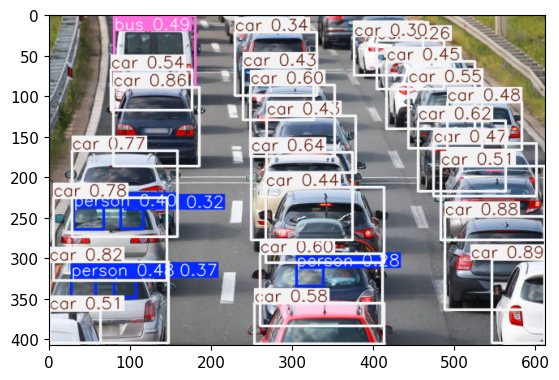

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[111, 120,  57],
         [108, 117,  54],
         [106, 115,  52],
         ...,
         [110, 121,  55],
         [ 94, 114,  55],
         [ 69,  97,  48]],
 
        [[103, 112,  49],
         [104, 113,  50],
         [105, 114,  51],
         ...,
         [107, 118,  52],
         [ 91, 111,  52],
         [ 66,  94,  43]],
 
        [[ 97, 106,  43],
         [101, 110,  47],
         [106, 115,  52],
         ...,
         [107, 116,  49],
         [ 92, 110,  50],
         [ 68,  95,  40]],
 
        ...,
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        [[224, 225, 233],
         [232, 233, 236],
         [232, 233, 236],
         ...,
         [203, 205, 214],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Exit when ESC is pressed
    if cv2.waitKey(10) & 0xFF == 27:  
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\rishi/.cache\torch\hub\ultralytics_yolov5_master\models

# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join("C:\\Users\\rishi\\GFG ML and DS course\\Driver Drowsiness Detection\\yolov5\\data", "images") 
labels = ['awake', 'drowsy']
number_imgs = 20

## Collecting Awake images

In [15]:
cap = cv2.VideoCapture(0)
for img_num in range(number_imgs):
    print('Collecting images for awake, image number {}'.format(img_num))
    
    ret, frame = cap.read()
    
    # Naming out image path
    imgname = os.path.join(IMAGES_PATH, 'awake.'+str(uuid.uuid1())+'.jpg')
    
    cv2.imwrite(imgname, frame)
    
    cv2.imshow('Image Collection', frame)
    
    # 2 second delay between captures
    time.sleep(2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Collecting Drowsy images

In [16]:
cap = cv2.VideoCapture(0)
for img_num in range(number_imgs):
    print('Collecting images for drowsy, image number {}'.format(img_num))
    
    ret, frame = cap.read()
    
    # Naming out image path
    imgname = os.path.join(IMAGES_PATH, 'drowsy.'+str(uuid.uuid1())+'.jpg')
    
    cv2.imwrite(imgname, frame)
    
    cv2.imshow('Image Collection', frame)
    
    # 2 second delay between captures
    time.sleep(2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.a2dbaf84-802c-11f0-bc95-44a3bbafc430.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.ac651dc3-802c-11f0-902e-44a3bbafc430.jpg
data\images\awake.ac651dc4-802c-11f0-a7f8-44a3bbafc430.jpg
data\images\awake.ac651dc5-802c-11f0-a2f8-44a3bbafc430.jpg
data\images\awake.ac651dc6-802c-11f0-935d-44a3bbafc430.jpg
data\images\awake.ac651dc7-802c-11f0-ab83-44a3bbafc430.jpg
data\images\drowsy.ac651dc8-802c-11f0-a9c5-44a3bbafc430.jpg
data\images\drowsy.ac651dc9-802c-11f0-979c-44a3bbafc430.jpg
data\images\drowsy.ac651dca-802c-11f0-a67f-44a3bbafc430.jpg
data\images\drowsy.ac651dcb-802c-11f0-ae7c-44a3bbafc430.jpg
data\images\drowsy.ac651dcc-802c-11f0-a637-44a3bbafc430.jpg


In [ ]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os
import random
import shutil
from glob import glob

# Paths
base_path = r"C:\Users\rishi\GFG ML and DS course\Driver Drowsiness Detection\yolov5\data"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

train_img_path = os.path.join(images_path, "train")
val_img_path = os.path.join(images_path, "val")
train_lbl_path = os.path.join(labels_path, "train")
val_lbl_path = os.path.join(labels_path, "val")

# Create folders
for path in [train_img_path, val_img_path, train_lbl_path, val_lbl_path]:
    os.makedirs(path, exist_ok=True)

# Get all images
image_files = glob(os.path.join(images_path, "*.jpg")) + glob(os.path.join(images_path, "*.png"))

# Split
random.shuffle(image_files)
split_idx = int(0.8 * len(image_files))
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

def move_files(files, img_dst, lbl_dst):
    for img in files:
        filename = os.path.basename(img)
        label = os.path.join(labels_path, filename.replace(".jpg", ".txt").replace(".png", ".txt"))
        shutil.move(img, os.path.join(img_dst, filename))
        if os.path.exists(label):
            shutil.move(label, os.path.join(lbl_dst, os.path.basename(label)))

move_files(train_files, train_img_path, train_lbl_path)
move_files(val_files, val_img_path, val_lbl_path)

print(f"{len(train_files)} images in train, {len(val_files)} in val.")


Done! 40 images in train, 10 in val.


In [6]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


False
CPU only


In [8]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

^C


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\rishi\GFG': No such file or directory
YOLOv5  2025-8-23 Python-3.10.0 torch-2.7.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

# 6. Load Custom Model

In [ ]:
model = torch.hub.load(r'c:\Users\rishi\Downloads\yolov5',
                       'custom',
                       path=r'c:\Users\rishi\Downloads\yolov5\runs\train\exp2\weights\best.pt',
                       source='local')

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()